In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#2.1
stock_data = pd.read_csv('D:\intern\module 1\week2.csv')

In [3]:
stock_data['Date'].dtype

dtype('O')

In [4]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Date'].dtype

dtype('<M8[ns]')

In [5]:
stock_data = stock_data.set_index('Date')

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

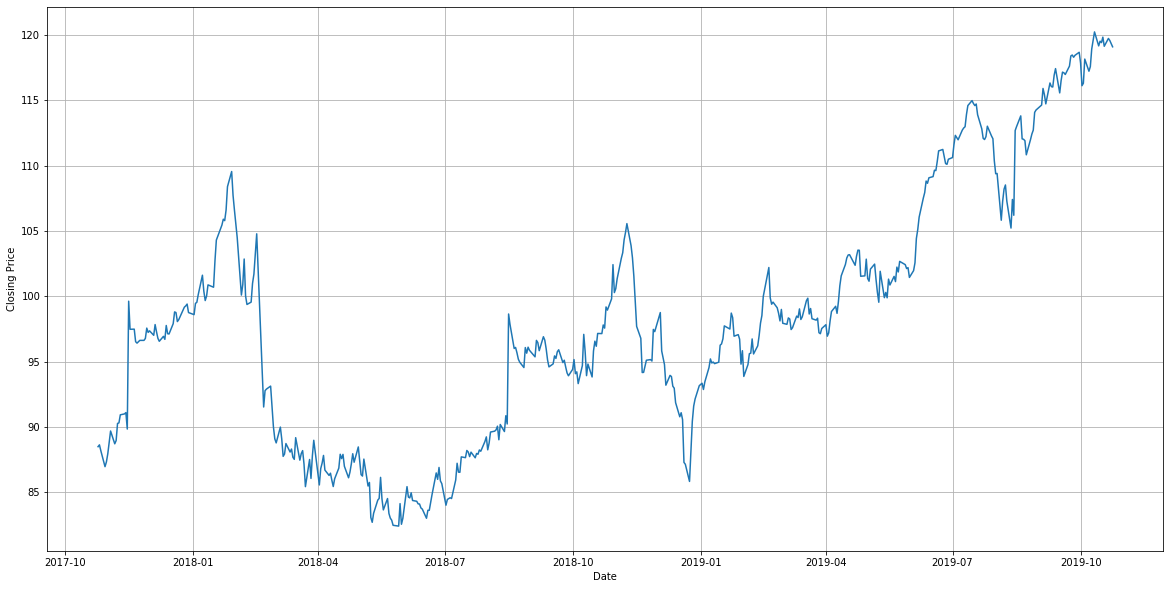

In [11]:
plt.figure(figsize=(20,10))
plt.plot(stock_data.index,stock_data['Close Price'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

From above graph, we can observe drastic change in 2nd, 3rd, 8th month of 2018 and 6th, 8th month of 2019

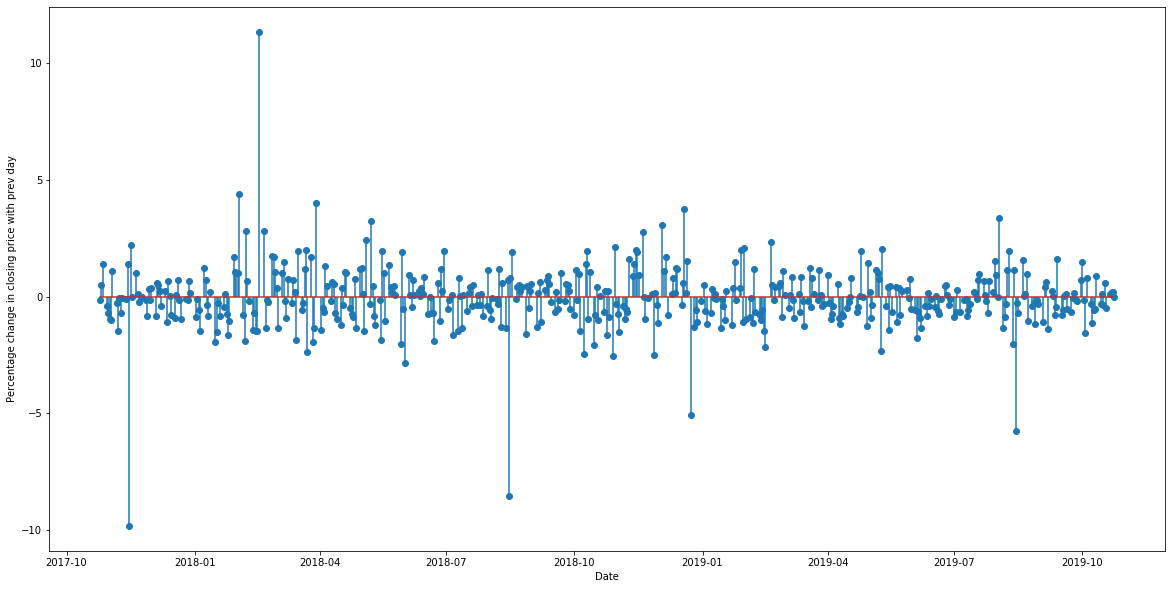

In [12]:
#2.2
plt.figure(figsize=(20,10))
plt.stem (stock_data.index,stock_data['Day_Perc_Change'],use_line_collection = True)
plt.ylabel('Percentage change in closing price with prev day')
plt.xlabel('Date')
plt.show()

From above graph, we can observe more drastic change in between 11th and 12th month of 2017,mid february of 2018 and mid august of 2019.
Considerable change during January, august-september of 2019

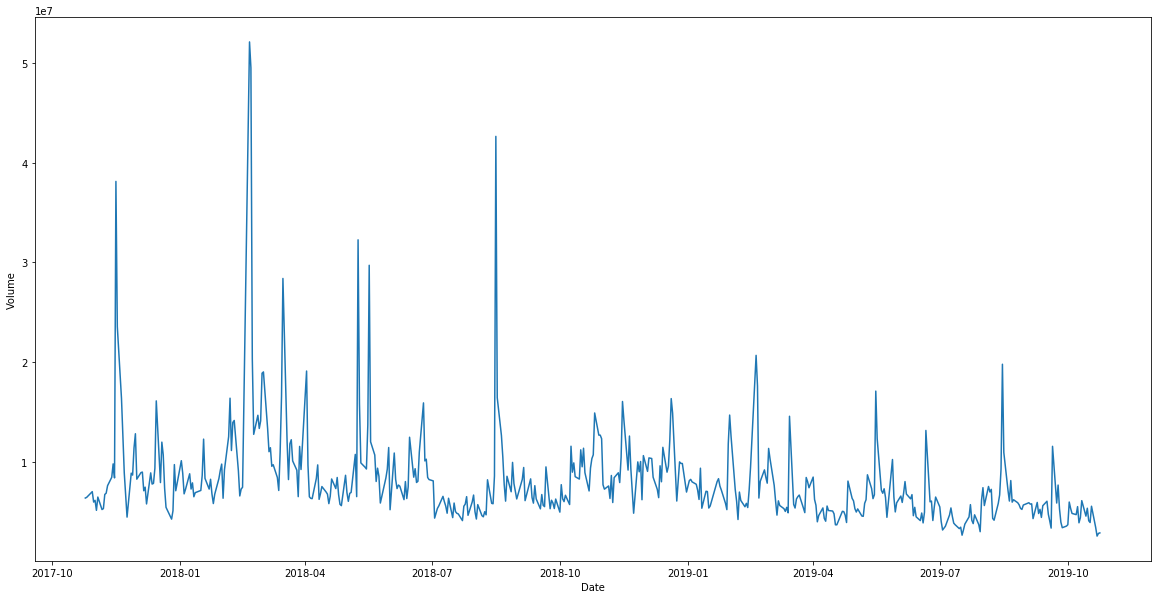

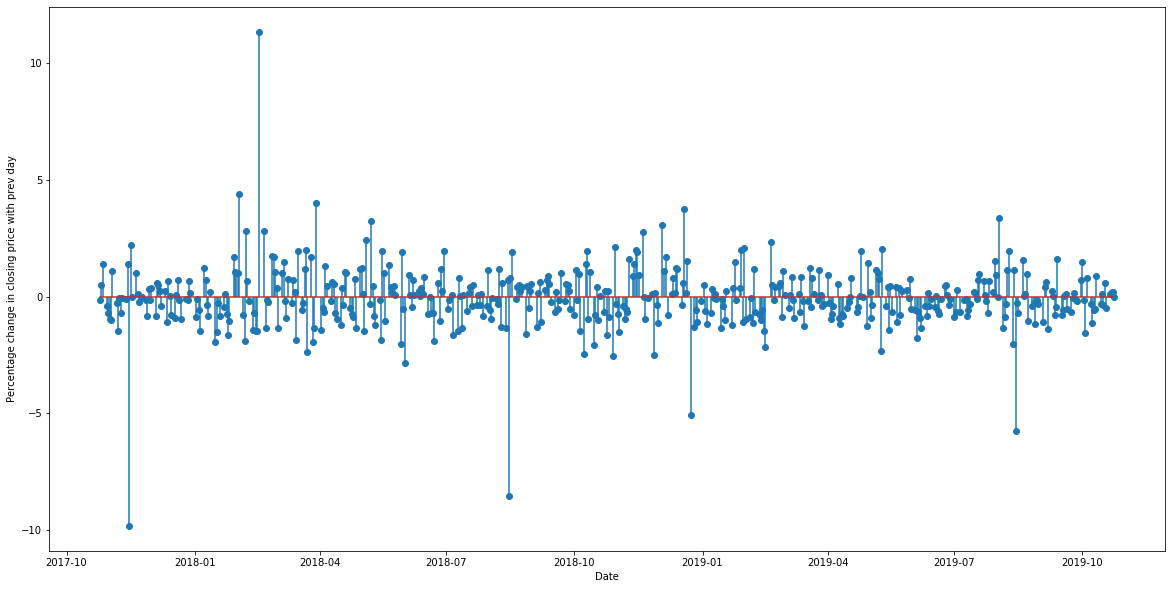

In [13]:
#2.3
plt.figure(figsize=(20,10))
plt.plot(stock_data.index,stock_data['Total Traded Quantity'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()
plt.figure(figsize=(20,10))
plt.stem (stock_data.index,stock_data['Day_Perc_Change'],use_line_collection = True)
plt.ylabel('Percentage change in closing price with prev day')
plt.xlabel('Date')
plt.show()

From the above two plots, we can observe that whenever there is a drastic change in % closing price there is drastic change in volume.

There is drastic change in volume between 11th and 12th month of 2017, we can observe that exactly at the same there is a drastic change in percentage change in consecitive closing prices.
Same kind of thing is observed around feb-march of 2018 and aug-sept of 2018 and 2019.

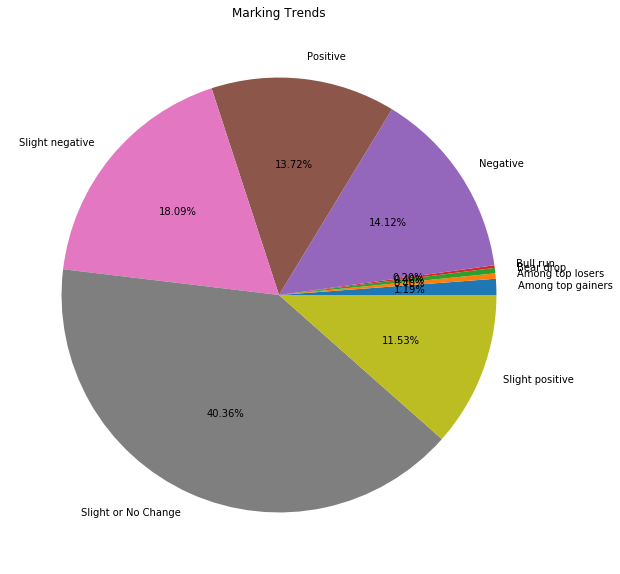

In [14]:
#2.4
dd = stock_data.groupby('Trend')['Close Price'].count()
plt.figure(figsize=(10,10))
plt.pie(dd,labels = dd.index,autopct = '%1.2f%%')
plt.title('Marking Trends')
plt.show()

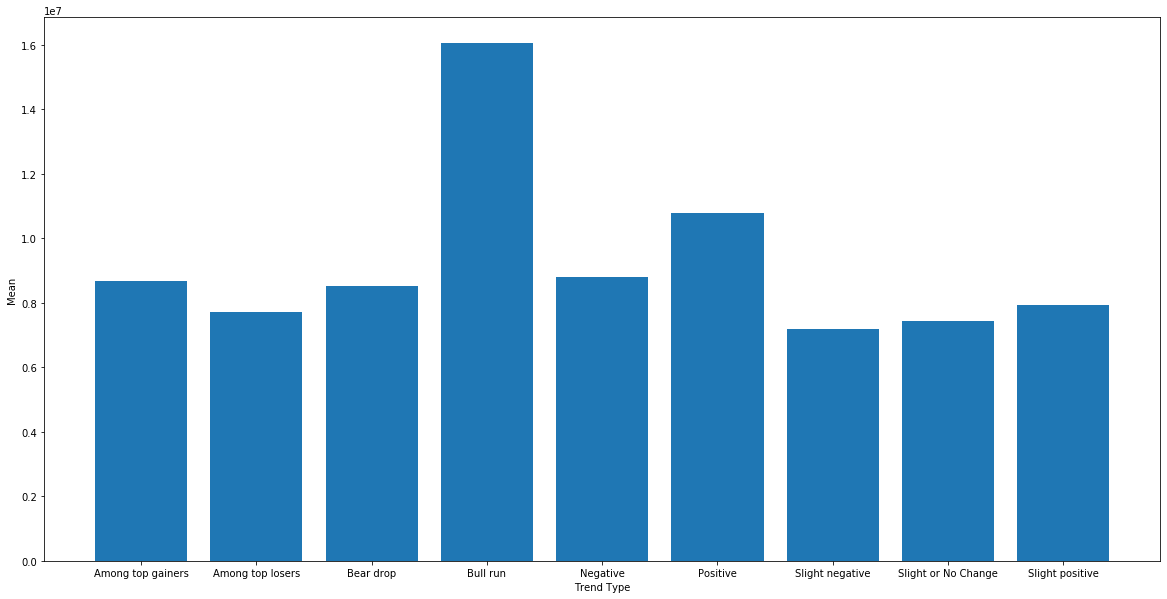

In [15]:
ddm = stock_data.groupby('Trend')['Total Traded Quantity'].mean()
plt.figure(figsize=(20,10))
plt.bar(ddm.index,ddm)
plt.xlabel('Trend Type')
plt.ylabel('Mean')
plt.show()

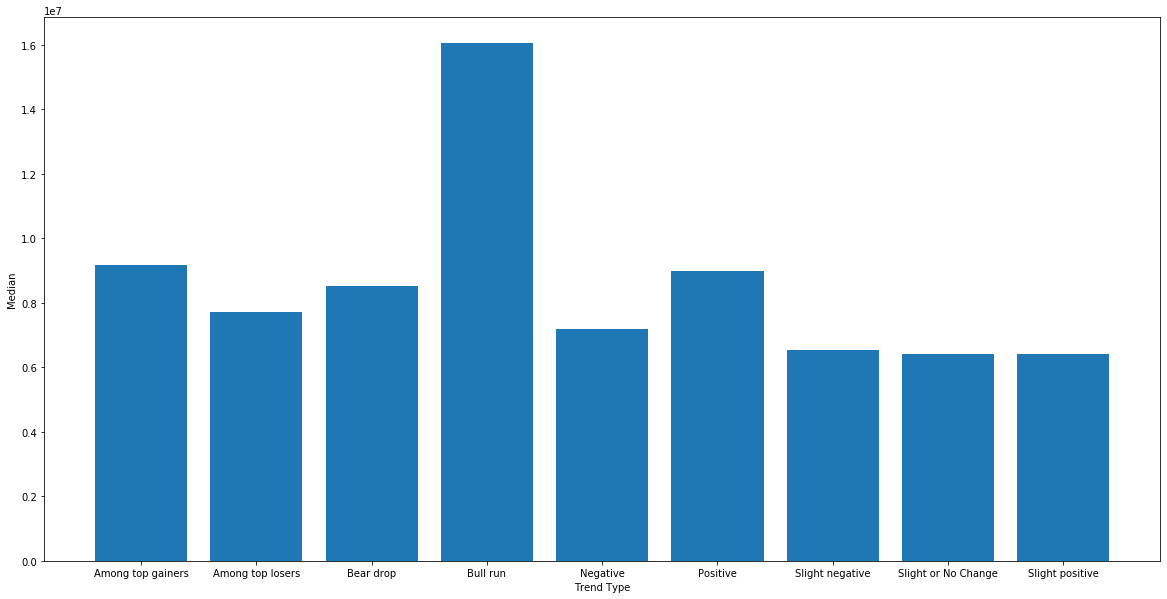

In [16]:
ddmed = stock_data.groupby('Trend')['Total Traded Quantity'].median()
plt.figure(figsize=(20,10))
plt.bar(ddmed.index,ddmed)
plt.xlabel('Trend Type')
plt.ylabel('Median')
plt.show()

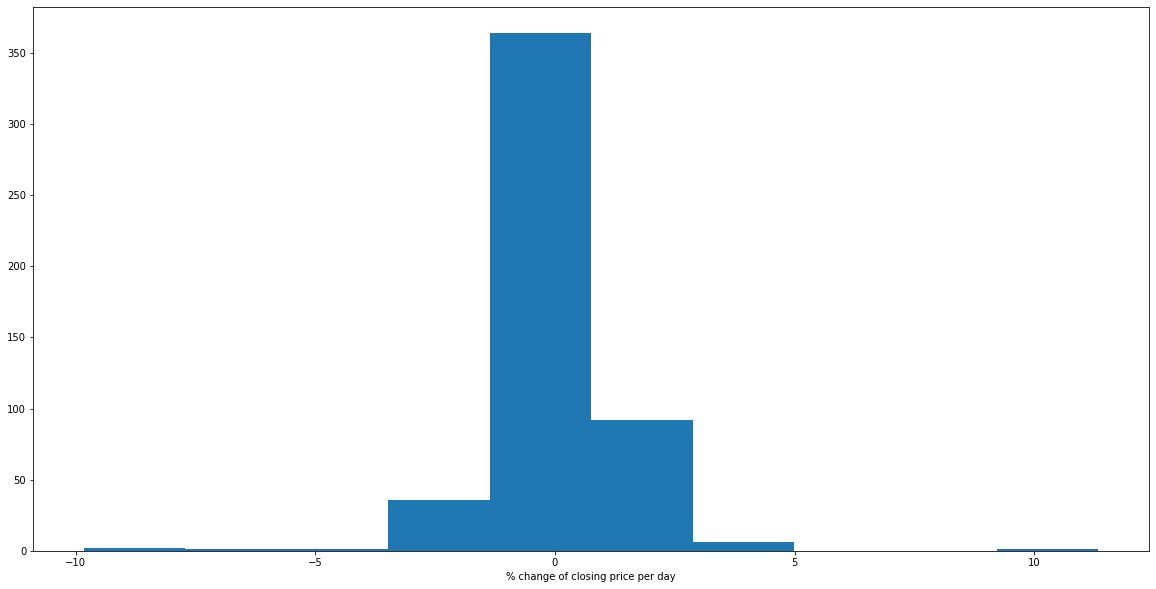

In [17]:
#2.5
plt.figure(figsize=(20,10))
plt.hist(stock_data['Day_Perc_Change'])
plt.xlabel('% change of closing price per day')
plt.show()

In [2]:
#2.6
df1 = pd.read_csv('D:\intern\module 1\Small_Cap\ASHOKA.csv')
df2 = pd.read_csv('D:\intern\module 1\Small_Cap\CENTURYPLY.csv')
df3 = pd.read_csv('D:\intern\module 1\Small_Cap\IDFC.csv')
df4 = pd.read_csv('D:\intern\module 1\Small_Cap\FORTIS.csv')
df5 = pd.read_csv('D:\intern\module 1\Small_Cap\JETAIRWAYS.csv')

In [3]:
df1 = df1[df1['Series'] == 'EQ']
df2 = df2[df2['Series'] == 'EQ']
df3 = df3[df3['Series'] == 'EQ']
df4 = df4[df4['Series'] == 'EQ']
df5 = df5[df5['Series'] == 'EQ']

In [4]:
cpdf = pd.DataFrame()
cpdf['ASHOKA'] = df1['Close Price']
cpdf['CENTURYPLY'] = df2['Close Price']
cpdf['IDFC'] = df3['Close Price']
cpdf['FORTIS'] = df4['Close Price']
cpdf['JETAIRWAYS'] = df5['Close Price']

In [5]:
ptchdf = pd.DataFrame()
ptchdf = cpdf.pct_change()

In [6]:
ptchdf.isnull().any()

ASHOKA        True
CENTURYPLY    True
IDFC          True
FORTIS        True
JETAIRWAYS    True
dtype: bool

In [7]:
ptchdf = ptchdf.dropna()

In [8]:
ptchdf.isnull().any() #all nan's are dropped

ASHOKA        False
CENTURYPLY    False
IDFC          False
FORTIS        False
JETAIRWAYS    False
dtype: bool

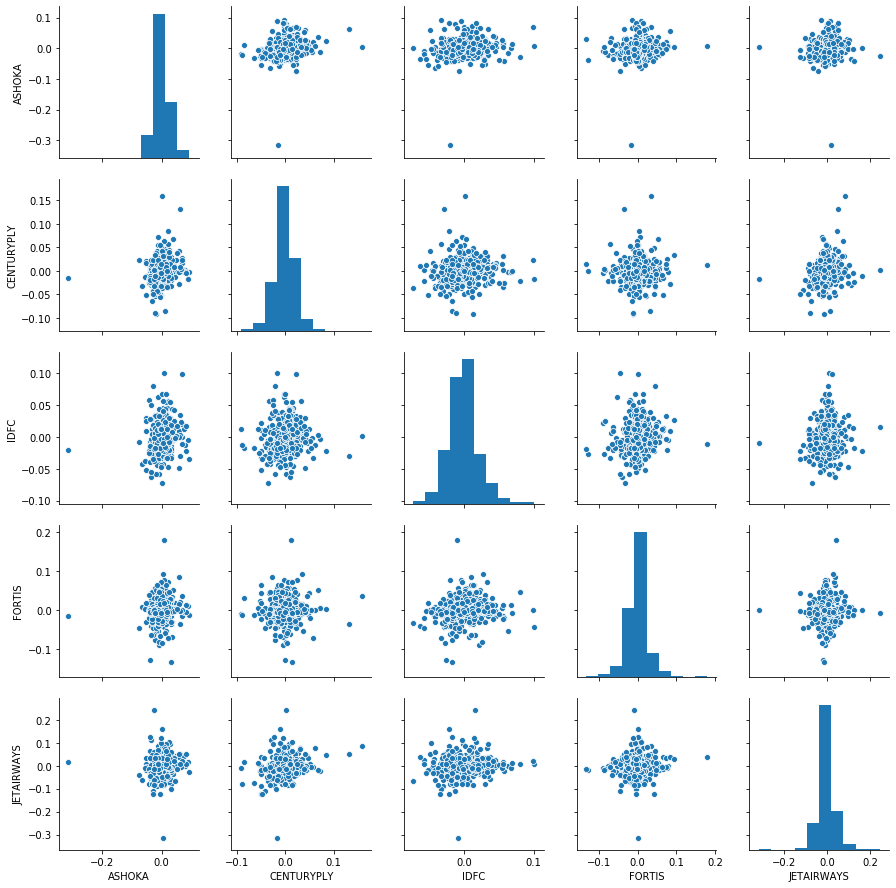

In [9]:
sns.pairplot(ptchdf)
plt.show()

In [10]:
df5['Date'] = pd.to_datetime(df5['Date'])

In [11]:
df5['Date'].dtype

dtype('<M8[ns]')

C:\Users\MITTU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


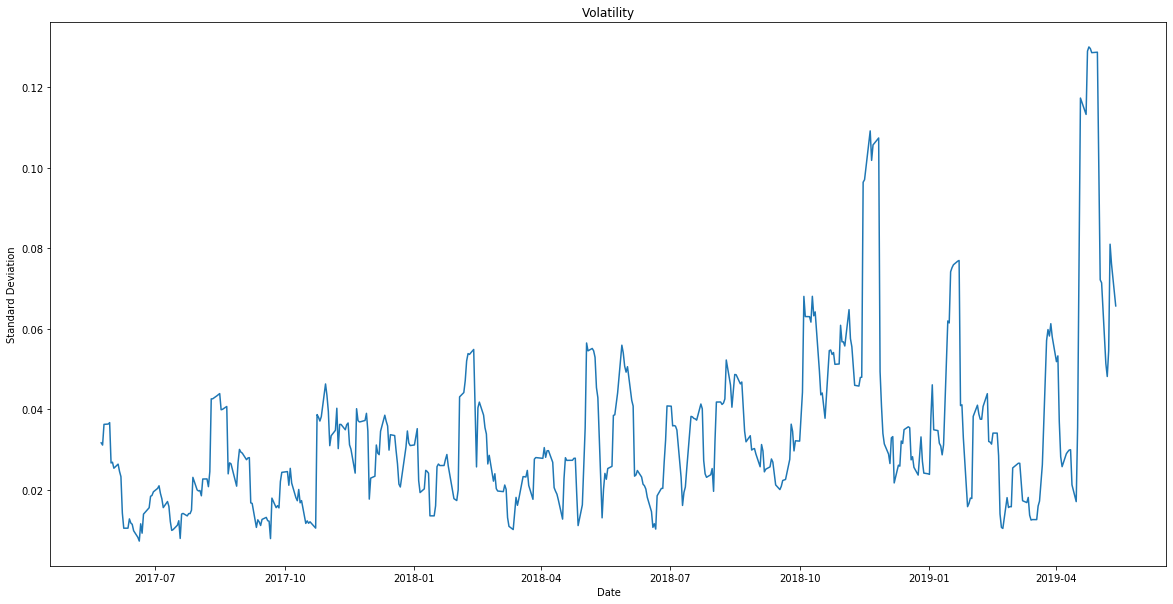

In [12]:
z = ptchdf['JETAIRWAYS'].rolling(7).std()
plt.figure(figsize=(20,10))
plt.plot(df5['Date'][1:],z)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()

In [13]:
#2.8
nifty = pd.read_csv('D:\intern\module 1\\Nifty50\\Nifty50.csv')
nifty['Day_Perc_Change'] = nifty['Close'].pct_change()
nifty['st_dv'] = nifty['Day_Perc_Change'].rolling(7).std()

In [14]:
nifty['Date'] = pd.to_datetime(nifty['Date'])

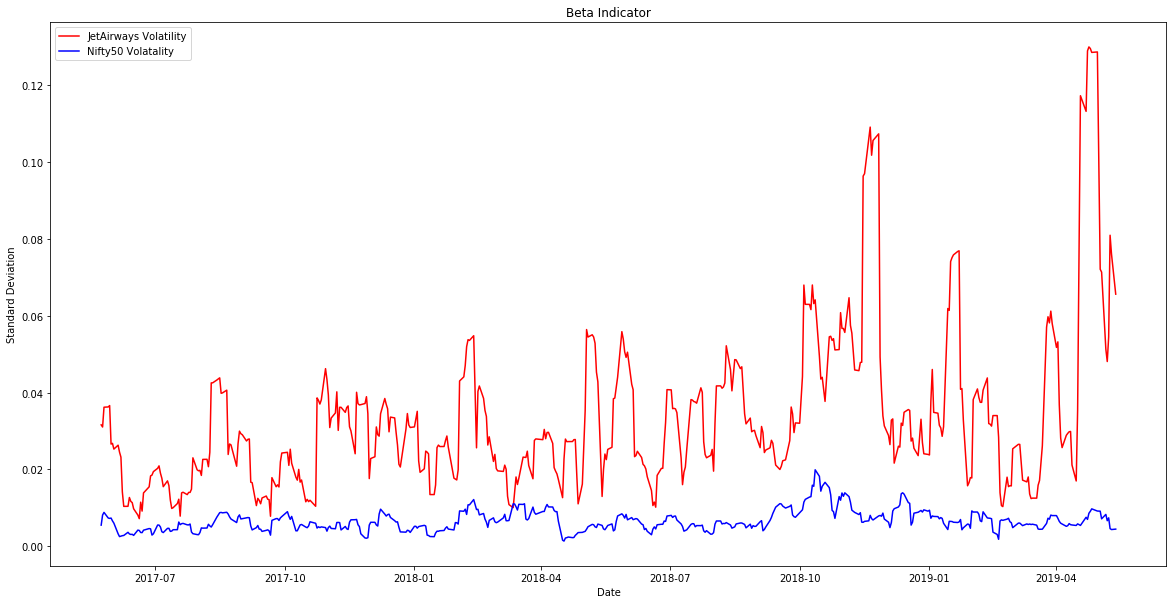

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df5['Date'][1:],z,color='red',label='JetAirways Volatility')
plt.plot(nifty['Date'],nifty['st_dv'],color='blue',label='Nifty50 Volatality')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.title('Beta Indicator')
plt.legend()
plt.show()

In [16]:
#2.9
df5['movavg_21day'] = df5['Average Price'].rolling(21).mean()
df5['movavg_34day'] = df5['Average Price'].rolling(34).mean()

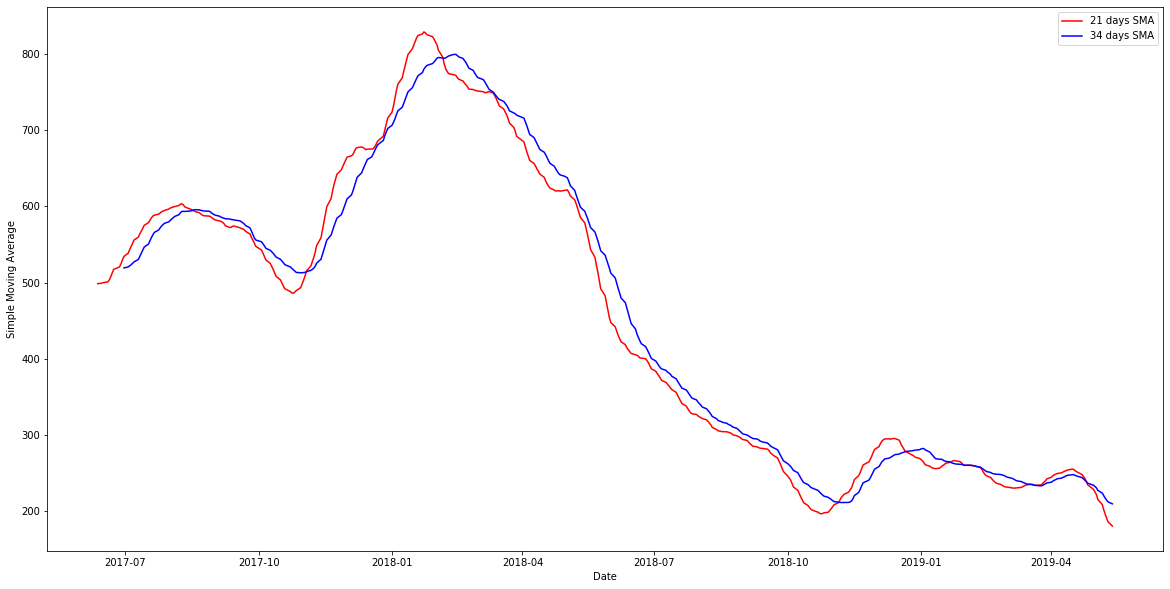

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df5['Date'],df5['movavg_21day'],color='red',label='21 days SMA')
plt.plot(df5['Date'],df5['movavg_34day'],color='blue',label='34 days SMA')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Simple Moving Average')
plt.show()

During 8th-9th month of 2017: Call is Sell.

During 11th-12th month of 2017: Call is Buy.

During 2nd month of 2018: Call is Sell.

During 11th month of 2018: Call is Buy.

During 12th month of 2018: Call is Sell.

During 2nd month of 2019: Call is Buy.

During 3rd month of 2019: Call is Sell.

During 3rd month ending of 2019: Call is Buy.

During 5th month of 2019: Call is Sell.

In [18]:
#2.10
df5['movavg_14day'] = df5['Average Price'].rolling(14).mean()
df5['stddiv_14day'] = df5['Average Price'].rolling(14).std()

df5['uppbound'] = df5['movavg_14day'] + 2*df5['stddiv_14day']
df5['lowbound'] = df5['movavg_14day'] - 2*df5['stddiv_14day']

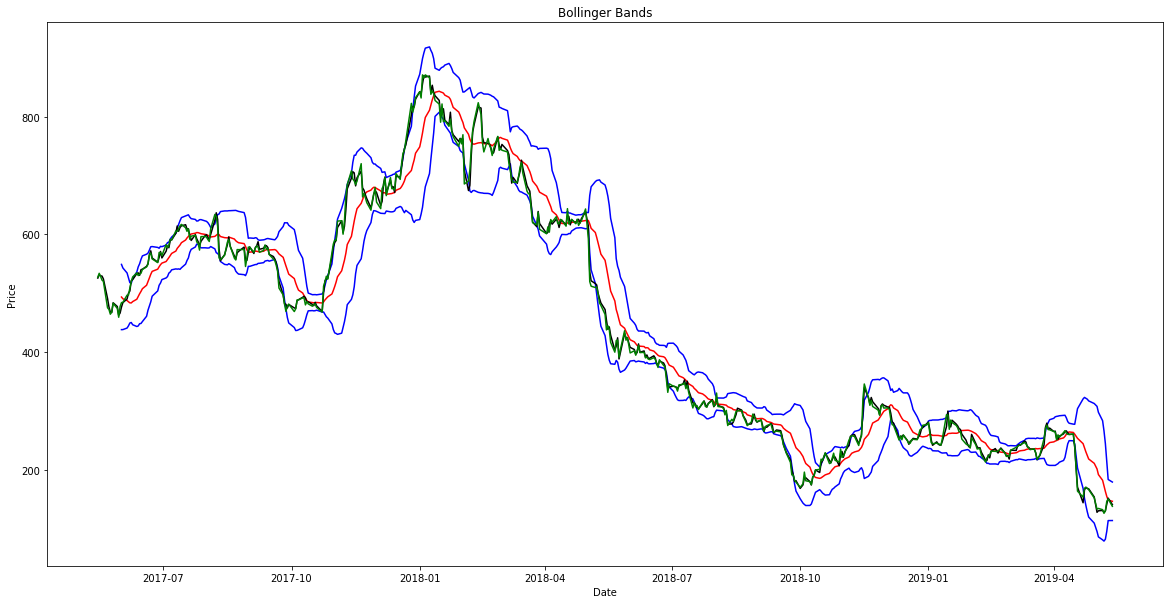

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df5['Date'],df5['movavg_14day'],color='red')
plt.plot(df5['Date'],df5['uppbound'],color='blue')
plt.plot(df5['Date'],df5['lowbound'],color='blue')
plt.plot(df5['Date'],df5['Average Price'],color='black')
plt.plot(df5['Date'],df5['Close Price'],color = 'green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
df5.to_csv('D:\intern\module 1\jetairways_edited.csv')